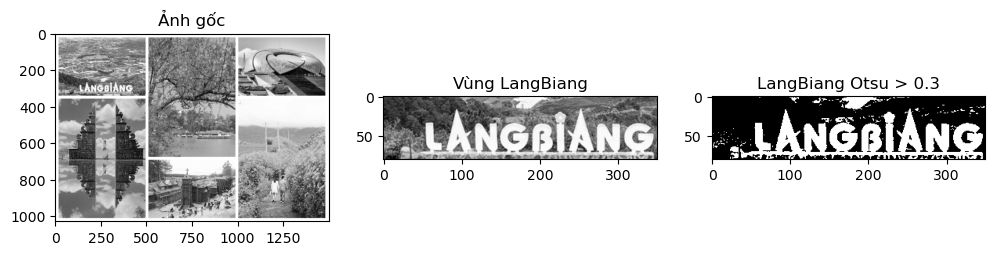

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh Đà Lạt từ thư mục exercise
img = cv2.imread('dalat.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Cắt đúng vùng chữ "LANGBIANG" (góc trên trái)
x, y, w, h = 80, 250, 350, 80  # Bạn có thể điều chỉnh lại cho vừa chữ
roi = img_gray[y:y+h, x:x+w]

# Tạo ảnh trắng mới để tịnh tiến vùng chọn sang phải 100px
canvas = np.zeros_like(img_gray)
canvas[y:y+h, x+100:x+100+w] = roi

# Phân vùng bằng Otsu trên vùng roi
_, mask = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
mask_norm = mask / 255.0
mask_03 = (mask_norm > 0.3).astype(np.uint8) * 255

# Lưu ảnh kết quả
cv2.imwrite('lang_biang.jpg', mask_03)

# Hiển thị kết quả
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(img_gray, cmap='gray')
plt.title('Ảnh gốc')

plt.subplot(1,3,2)
plt.imshow(roi, cmap='gray')
plt.title('Vùng LangBiang')

plt.subplot(1,3,3)
plt.imshow(mask_03, cmap='gray')
plt.title('LangBiang Otsu > 0.3')

plt.show()